In [3]:
from Architectures.AE import AE
# from Data.load import load
# from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
# train, test = load("Pre-processed")
groups = {}
for group in tqdm(["CN"],"Opening faster"): # ,"MCI","AD"
    groups[group]=np.load(open(f"Data/{group}.npy","br"))

# train = groups["CN"][:1000]
# test = groups["CN"][1000:]

Opening faster: 100%|██████████| 1/1 [00:09<00:00,  9.98s/it]


In [5]:
ae = AE.open("Trained Models/AE/optimal_depths/(2, 4, 8)")

Models loaded and compiled successfully.


In [6]:
latent = ae.encode(groups["CN"])
recon = ae.decode(latent)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step


In [7]:
mean_input = np.mean(groups["CN"], axis=0)
mean_recon = np.mean(recon, axis=0)

In [21]:
%pip install visualkeras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\PieHu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


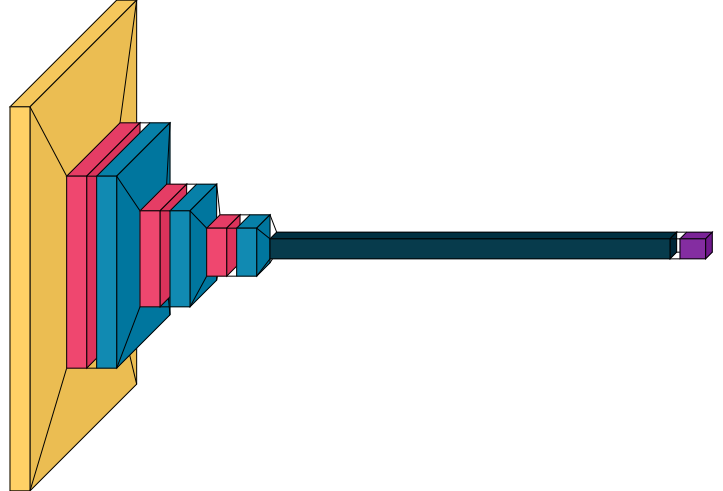

In [26]:
import visualkeras

model = ae.encoder

# visualkeras.layered_view(model).show() # display using your system viewer
# visualkeras.layered_view(model, to_file='output.png') # write to disk
# visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

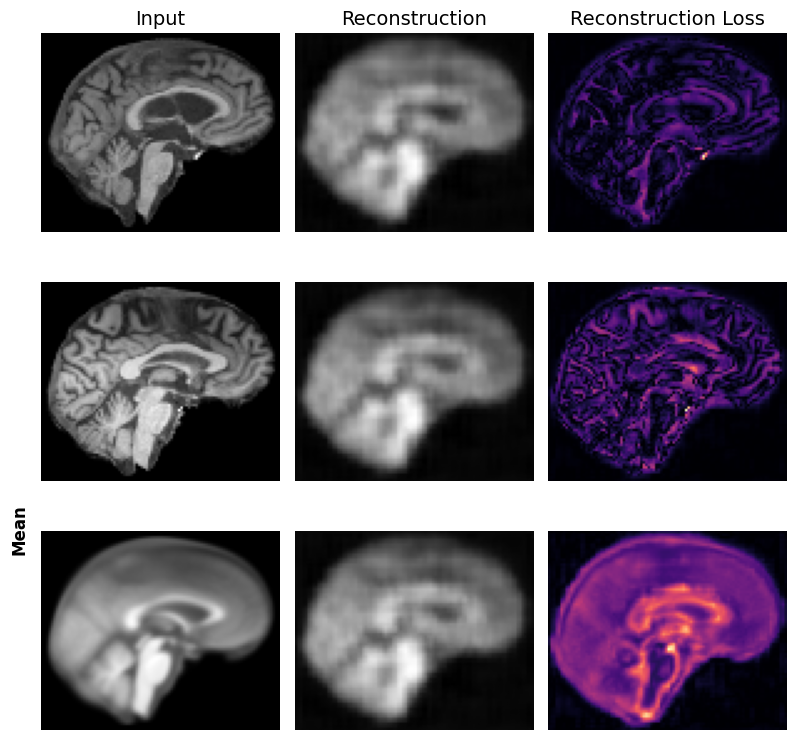

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Compute reconstruction loss
# loss = np.abs(groups["CN"] - recon.reshape(groups["CN"].shape))
# mean_loss = np.mean(loss, axis=0)

# Set up the figure
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Column titles
titles = ['Input', 'Reconstruction', 'Reconstruction Loss']
for i in range(3):
    axes[0, i].set_title(titles[i], fontsize=14)

# Row 1: Sample 1
axes[0, 0].imshow(np.rot90(groups["CN"][0][40]), cmap='gray')
axes[0, 1].imshow(np.rot90(recon[0][40]), cmap='gray')
axes[0, 2].imshow(np.rot90(loss[0][40]), cmap='magma')

# Row 2: Sample 2
axes[1, 0].imshow(np.rot90(groups["CN"][1][40]), cmap='gray')
axes[1, 1].imshow(np.rot90(recon[1][40]), cmap='gray')
axes[1, 2].imshow(np.rot90(loss[1][40]), cmap='magma')

# Row 3: Mean
axes[2, 0].imshow(np.rot90(mean_input[40]), cmap='gray')
axes[2, 1].imshow(np.rot90(mean_recon[40]), cmap='gray')
axes[2, 2].imshow(np.rot90(mean_loss[40]), cmap='magma')

# Turn off axis ticks
for row in axes:
    for ax in row:
        ax.axis('off')

# Add "Mean" label above the bottom row
fig.text(0.01, 0.31, 'Mean', fontsize=12, fontweight='bold', va='center', rotation='vertical')
plt.tight_layout(rect=[0.03, 0, 1, 1])  # Adjust layout to make space for text
plt.show()


In [9]:
latent_dim = 10
ae = AE(train.shape,halvings=4, init_hidden_depth=8, hidden_depth_grow_factor=5, latent_dim=latent_dim, output_activation="tanh")

Interpreted image shape: (80, 96, 80, 1)
Pre-flattened latent shape: (None, 5, 6, 5, 1000)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 10)             │     7,126,114 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    34,276,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,402,219 (157.94 MB)

 Trainable params: 41,402,219 (157.94 MB)

 Non-trainable params: 0 (0.00 B)

-0.26979503404230215 0.9090219800157318


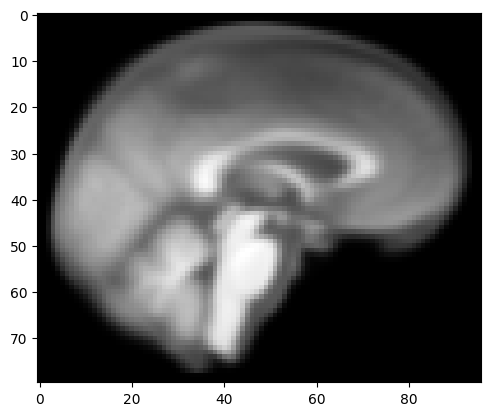

In [10]:
# Train on the diff to the mean brain instead
mean_brain = np.mean(train, axis=0)
diff_train = train - 0.5*mean_brain
diff_test = test - 0.5*mean_brain
plt.imshow(np.rot90(mean_brain[40]),cmap="gray") # diff_train[0][40]
print(np.min(diff_train), np.max(diff_train))

In [ ]:
ae.train(diff_train, epochs=30, batch_size=20)
ae.save(f"Trained Models/AE/{latent_dim}.1")

In [ ]:
# from Metrics.metrics import MSE
from Architectures.AE import AE
import pandas as pd
# model: hidden_depth_grow_factor, init_hidden_depth
#.1: 2, 8
#.2: 2, 8
#.3: 5, 8
#.4: 2, 2

df = {}
for hidden_depth_grow_factor, init_hidden_depth, label in [[2,8,"Medium"], [5,8,"Large"], [2,2,"Small"]]:
    dims = [1,2,3,5,6, 7, 8, 9, 10,11,12,13,14,15,16,17,20,25, 30,35, 50, 100, 300, 500, 1000]
    loss = []
    param_count = []
    for latent_dim in dims: # train.shape
        ae_ = AE([1, 80, 96, 80], halvings=4,
                 init_hidden_depth=init_hidden_depth,
                 hidden_depth_grow_factor=hidden_depth_grow_factor,
                 latent_dim=latent_dim, output_activation="tanh")
        # try:
        #     ae_ = AE.open(f"Trained Models/AE/compare_latent/{latent_dim}.3")
        # except:
        #     print(latent_dim)
        #     break
        param_count.append(ae_.encoder.count_params() + ae_.decoder.count_params())
        # ae_.train(train, epochs=20, batch_size=20)
        # ae_.save(f"Trained Models/AE/compare_latent/{latent_dim}.4")
        # latent = ae_.encode(test) # diff_
        # recon = ae_.decode(latent)
        # loss.append(MSE(test, recon))
    df[label] = param_count

df = pd.DataFrame(df)
df


In [15]:
df["# dimensions"] = dims
df.reset_index(drop=True, inplace=True)
print(df.quantile([0.25, 0.5, 0.75]).astype("int").reset_index().rename(columns={"index":"Quantile"}).to_latex(index=False))

\begin{tabular}{rrrrr}
\toprule
Quantile & Medium & Large & Small & # dimensions \\
\midrule
0.250000 & 419625 & 40802217 & 56961 & 8 \\
0.500000 & 534831 & 42602223 & 85767 & 14 \\
0.750000 & 842047 & 47402239 & 162583 & 30 \\
\bottomrule
\end{tabular}



In [8]:
loss = [loss[-1]] + loss[:-1]

In [13]:

import json
json.dump({"dims":dims,"loss":loss},open("Cache/loss_per_latent_dim4.json","w")) # CHANGE THIS NUMBER HERE

Text(0, 0.5, 'Reconstruction loss')

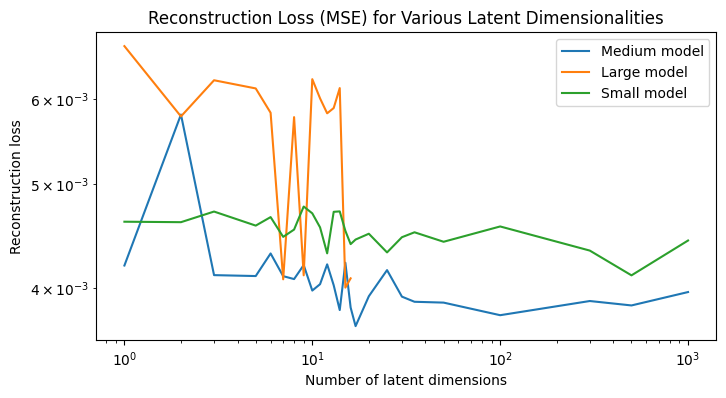

In [35]:
from matplotlib import pyplot as plt
import json
# json.dump({"dims":dims,"loss":loss},open("Cache/loss_per_latent_dim2.json","w")) # CHANGE THIS NUMBER HERE
# Read json
losses = []
plt.figure(figsize=(8,4))
for i in range(4):
    # if i==2: continue
    data = json.load(open(f"Cache/loss_per_latent_dim{i+1}.json","r"))
    losses.append(data["loss"])#[:15])
    dims = data["dims"]#[:15]
    # plt.plot(dims,data["loss"][:15])
avg_loss = np.mean(losses[:2], axis=0)
# avg_loss1 = np.mean(losses[2:], axis=0)
# avg_loss1 = np.clip(avg_loss1, 1e-10, 0.01)
# std_loss = np.std(losses, axis=0)

plt.plot(dims,losses[1], label="Medium model")
plt.plot(dims[:15],losses[2][:15], label="Large model")
plt.plot(dims,losses[3], label="Small model")
plt.legend()
# plt.plot(dims,avg_loss-std_loss, "r--", label="std")
# plt.plot(dims,avg_loss)
plt.xscale("log")
plt.yscale("log")
plt.title("Reconstruction Loss (MSE) for Various Latent Dimensionalities")
plt.xlabel("Number of latent dimensions")
plt.ylabel("Reconstruction loss")

In [104]:
ae.save("Trained Models/large-360")

Models saved to TrainedModels/Temp


In [29]:
ae = ae_
latent = ae.encode(test)
recon = ae.decode(latent)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


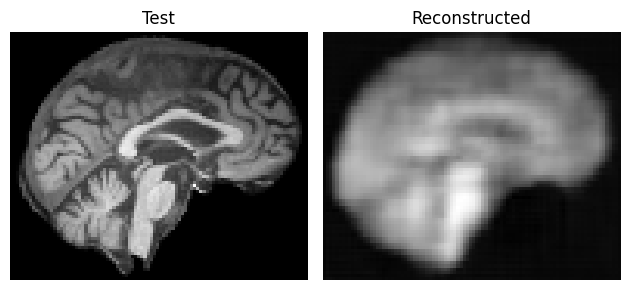

In [34]:
test_id = 9
plt.subplot(1, 2, 1)
plt.imshow(np.rot90(test[test_id][40].reshape((96, 80))), cmap="gray")
plt.title("Test")
plt.axis('off')  # Hide axes for a cleaner look

plt.subplot(1, 2, 2)
plt.imshow(np.rot90(recon[test_id][40]), cmap="gray")
plt.title("Reconstructed")
plt.axis('off')  # Hide axes for a cleaner look
plt.tight_layout()  # Adjust layout for better spacing


In [7]:
from Metrics.metrics import NMSE, SSIM
SSIM(recon.reshape(diff_test.shape), diff_test)

0.47985097879764366

Retained variance 0.9821266252547503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


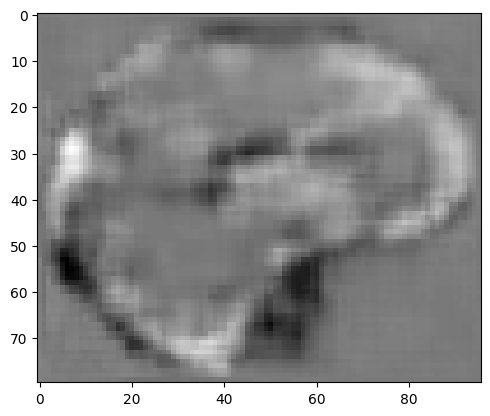

In [30]:
from sklearn.decomposition import PCA

pca=PCA(7)
pca_latent = pca.fit_transform(latent)
print("Retained variance",sum(pca.explained_variance_ratio_))
pca_recon = ae.decode(pca.inverse_transform(pca_latent))
plt.imshow(np.rot90(pca_recon[0][40].reshape((96,80))),cmap="gray") # mean_brain[40]+

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Retained variance 0.37408386170864105
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step


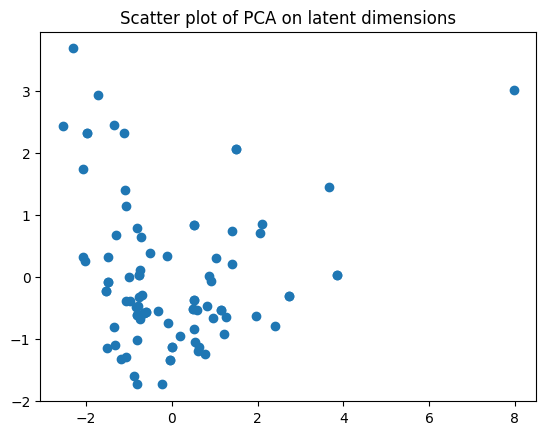

In [23]:
pca=PCA(2) # We need ca 50. 2 components is far too little.
latent = ae.encode(diff_train)
pca_latent = pca.fit_transform(latent)
print("Retained variance",sum(pca.explained_variance_ratio_))
pca_recon = ae.decode(pca.inverse_transform(pca_latent))

plt.title("Scatter plot of PCA on latent dimensions")
plt.scatter(pca_latent[:,0],pca_latent[:,1])

There's an outlier at x>5! Let's check it out :)

In [ ]:
idx = np.where(pca_latent[:,0] > 5)[0][0]
plt.imshow(np.rot90(train[idx][40]),cmap="gray")

NameError: name 'pca_latent' is not defined

: 

Wth is wrong with this guy like half his brain is cut out behind???

In [10]:
ae.encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 4, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_25 (Conv3D)              │ (None, 16, 16, 2, 12)  │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 2, 12)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_26 (Conv3D)              │ (None, 8, 8, 1, 36)    │        11,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 8, 8, 1, 36)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │     9,441,280 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,453,316 (36.06 MB)

 Trainable params: 9,453,316 (36.06 MB)

 Non-trainable params: 0 (0.00 B)

Pre-flattened latent shape: (None, 8, 8, 1, 96)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 4, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 4096)           │    25,201,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 32, 32, 4, 1)   │    25,452,337 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,653,793 (193.23 MB)

 Trainable params: 50,653,793 (193.23 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


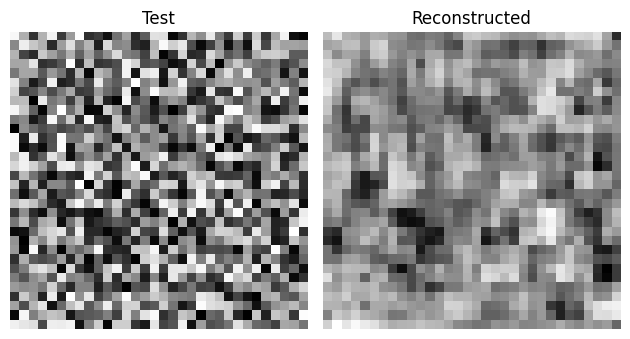

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


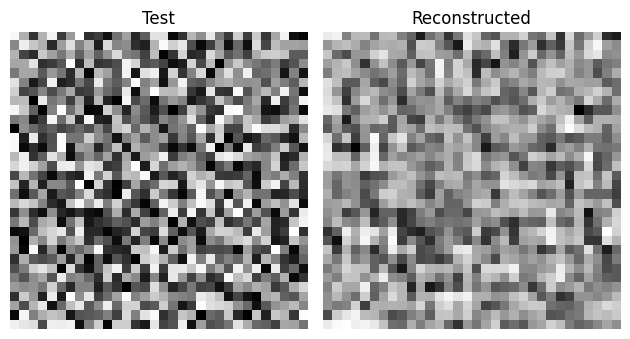

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


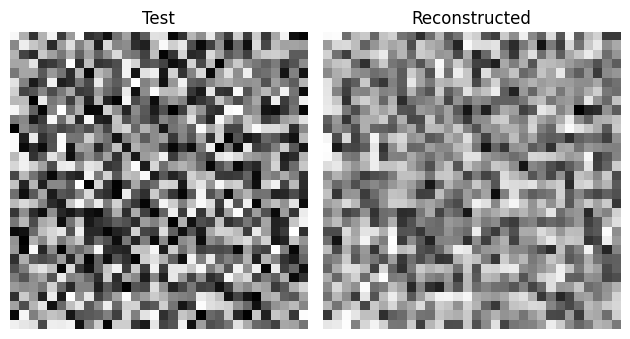

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


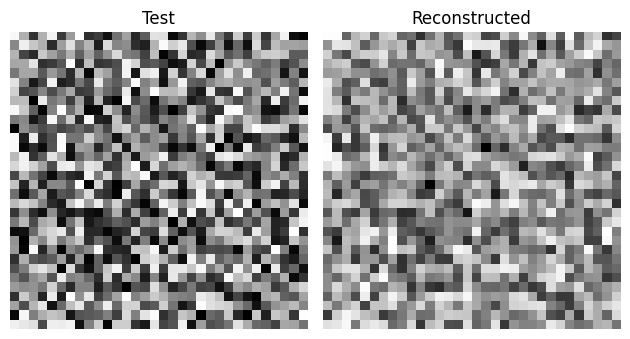

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


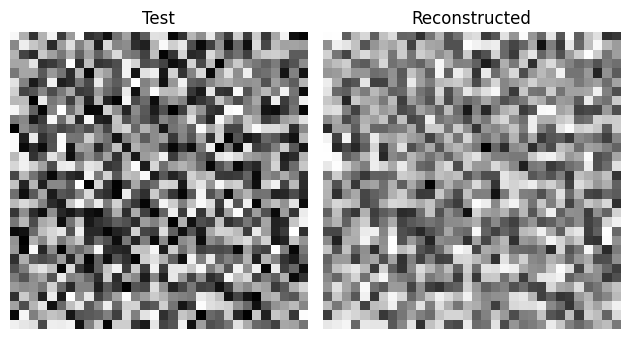

In [7]:
test_noisy_image = np.random.random((32,32,4,1))
ae = AE(test_noisy_image.shape,hidden_depth_grow_factor=8,init_hidden_depth=12,latent_dim=32*32*4)
for _ in range(5):
    ae.train(np.stack([test_noisy_image,test_noisy_image]),epochs=50,verbose=False)

    test_id = 1
    plt.subplot(1, 2, 1)
    plt.imshow(test_noisy_image.reshape((32,32,4,1))[:,:,0,:], cmap="gray")
    plt.title("Test")
    plt.axis('off')  # Hide axes for a cleaner look

    plt.subplot(1, 2, 2)
    latent = ae.encode(np.stack([test_noisy_image]))
    plt.imshow(ae.decode(latent)[0].reshape((32,32,4,1))[:,:,0,:], cmap="gray")
    plt.title("Reconstructed")
    plt.axis('off')  # Hide axes for a cleaner look
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


Pre-flattened latent shape: (None, 8, 8, 1, 36)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 4, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 4096)           │     9,453,316 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 32, 32, 4, 1)   │     9,486,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,939,833 (72.25 MB)

 Trainable params: 18,939,833 (72.25 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


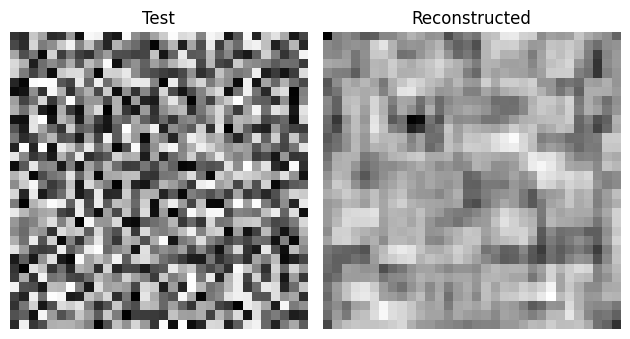

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


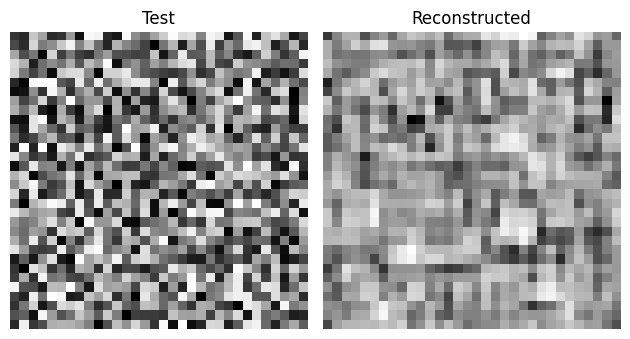

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


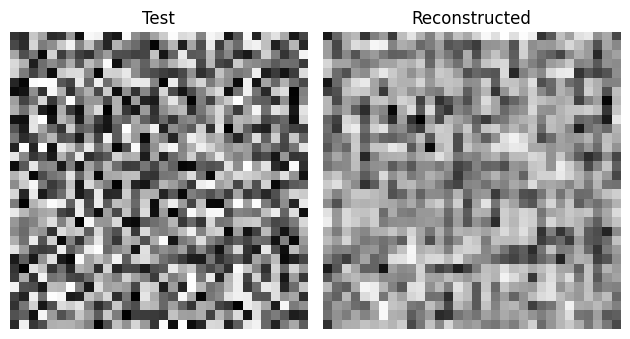

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


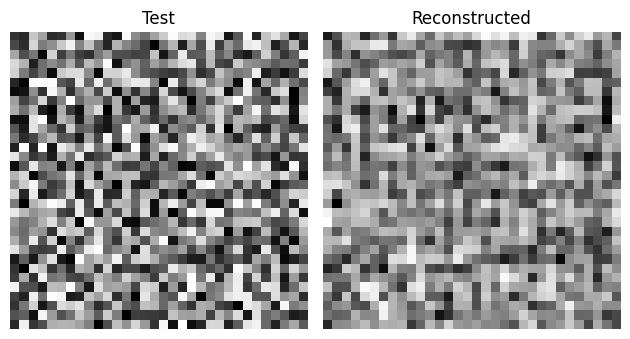

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


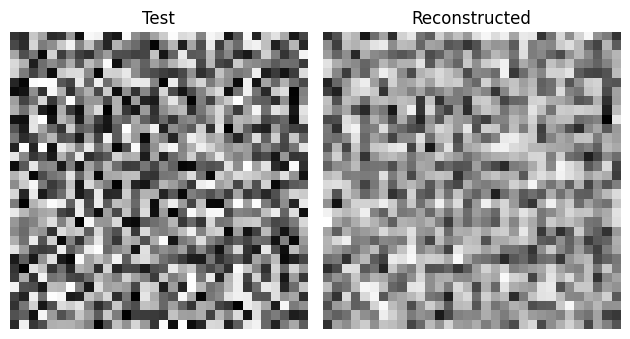

In [8]:
test_noisy_image = np.random.random((32,32,4,1))
ae = AE(test_noisy_image.shape,hidden_depth_grow_factor=3,init_hidden_depth=12,latent_dim=32*32*4)
for _ in range(5):
    ae.train(np.stack([test_noisy_image,test_noisy_image]),epochs=50,verbose=False)

    test_id = 1
    plt.subplot(1, 2, 1)
    plt.imshow(test_noisy_image.reshape((32,32,4,1))[:,:,0,:], cmap="gray")
    plt.title("Test")
    plt.axis('off')  # Hide axes for a cleaner look

    plt.subplot(1, 2, 2)
    latent = ae.encode(np.stack([test_noisy_image]))
    plt.imshow(ae.decode(latent)[0].reshape((32,32,4,1))[:,:,0,:], cmap="gray")
    plt.title("Reconstructed")
    plt.axis('off')  # Hide axes for a cleaner look
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
